# Demonstration of Facial Emotion Recognition on Real Time Video Using CNN 

Xception CNN Model (https://arxiv.org/pdf/1710.07557.pdf)
will train a classification CNN model architecture which takes bounded face (48*48 pixels) as input and predicts probabilities of 7 emotions in the output layer.


Load the dataset

In [1]:
import pandas as pd
import os
faces_ds = pd.read_csv("fer2013.csv")
ds = faces_ds

In [2]:
ds.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

In [3]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
def load_ds(ds):
    pixels = ds['pixels'].tolist()
    width, height = 48, 48
    image_size = (48,48)
    faces = []
    for pixel_seq in pixels:
        face = [int(pixel) for pixel in pixel_seq.split(' ')]
        face = np.asarray(face).reshape(width, height)
        face = cv2.resize(face.astype('uint8'),image_size)
        faces.append(face.astype('float32'))
    faces = np.asarray(faces)
    faces = np.expand_dims(faces, -1)
    emotions = pd.get_dummies(ds['emotion']).as_matrix()
    return faces, emotions
    

In [5]:
faces, emotion = load_ds(ds)

c:\users\camng3\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


In [6]:
faces.shape

(35887, 48, 48, 1)

In [7]:
emotion

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [8]:
def preprocess_input(x, v2=True):
    x = x.astype('float32')
    x = x / 255.0
    if v2:
        x = x - 0.5
        x = x * 2.0
    return x

In [9]:
faces = preprocess_input(faces)
xtrain, xtest, ytrain, ytest = train_test_split(faces, emotion,test_size=0.2,shuffle=True)

In [ ]:
# from array to images  - for coloured images

# # load and display an image with Matplotlib
# from matplotlib import image
# from matplotlib import pyplot
# # load image as pixel array
# # summarize shape of the pixel array
# print(faces[0].shape)
# # display the array of pixels as an image
# pyplot.imshow(faces[0])
# pyplot.show()

#from array to images - for black and whit images 

In [3]:
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2
import pandas as pd
import cv2
import numpy as np
 
# parameters
batch_size = 32
num_epochs = 110
input_shape = (48, 48, 1)
verbose = 1
num_classes = 7
patience = 50
base_path = 'models/'
l2_regularization=0.01
 
# data generator
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)
 
# model parameters
regularization = l2(l2_regularization)
 
# base
img_input = Input(input_shape)
x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization, use_bias=False)(img_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

#------------------------The 4 times I repeat 
 
# module 1
residual = Conv2D(16, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)
x = SeparableConv2D(16, (3, 3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(16, (3, 3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])
 
# module 2
residual = Conv2D(32, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)
x = SeparableConv2D(32, (3, 3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(32, (3, 3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])
 
# module 3
residual = Conv2D(64, (1, 1), strides=(2, 2),padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)
x = SeparableConv2D(64, (3, 3), padding='same',kernel_regularizer=regularization,use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(64, (3, 3), padding='same',kernel_regularizer=regularization,use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])
 
# module 4
residual = Conv2D(128, (1, 1), strides=(2, 2),padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)
x = SeparableConv2D(128, (3, 3), padding='same',kernel_regularizer=regularization,use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(128, (3, 3), padding='same',kernel_regularizer=regularization,use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

#------------------------end for loop 4 times

x = Conv2D(num_classes, (3, 3), padding='same')(x)
x = GlobalAveragePooling2D()(x)
output = Activation('softmax',name='predictions')(x)
 
model = Model(img_input, output)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


KeyboardInterrupt: 

In [2]:
# callbacks
log_file_path  = '_emotion_training.log'
csv_logger = CSVLogger(log_file_path, append=False)
early_stop = EarlyStopping('val_loss', patience=patience)

#Reduce learning rate when a metric has stopped improving.
#patience: number of epochs with no improvement after which learning rate will be reduced.
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1, patience=int(patience/4), verbose=1)
trained_models_path =  '_mini_XCEPTION'
model_names = trained_models_path + '.{epoch:02d}-{val_acc:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,save_best_only=True)
callbacksss = [model_checkpoint, csv_logger, early_stop, reduce_lr]



NameError: name 'CSVLogger' is not defined

In [ ]:
#In keras, fit() is much similar to sklearn's fit method, 
#where you pass array of features as x values and target as y values. 
#You pass your whole dataset at once in fit method. 
#Also, use it if you can load whole data into your memory (small dataset).

#In fit_generator(), you don't pass the x and y directly,
#instead they come from a generator. As it is written in keras 
#documentation, generator is used when you want to avoid duplicate
#data when using multiprocessing. This is for practical purpose, 
#when you have large dataset.


model.fit_generator(data_generator.flow(xtrain, ytrain,batch_size),
                        steps_per_epoch=len(xtrain) / batch_size,
                        epochs=num_epochs, verbose=1, callbacks=callbacksss,
                        validation_data=(xtest,ytest))

# To classify a single new image 

In [3]:
from keras.models import load_model
import cv2
from IPython.display import Image
from cv2 import rectangle
from cv2 import imshow
from keras.preprocessing.image import img_to_array
from cv2 import waitKey
import numpy as np

Using TensorFlow backend.


In [4]:
#load model for face recognition
face_model = "haarcascade_frontalface_default.xml"
emotion = "emotion_model.hdf5"

In [5]:
face_dec = cv2.CascadeClassifier(face_model)
emotion_model = load_model(emotion)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [6]:
EMOTIONS = ["angry","disgust","scared", "happy", "sad", "surprised","neutral"]

In [7]:
image = cv2.imread("smiling_face.jpg",0)

In [8]:
image

array([[161, 161, 160, ..., 144, 143, 142],
       [160, 160, 160, ..., 137, 136, 135],
       [158, 159, 159, ..., 136, 135, 135],
       ...,
       [ 69,  72,  69, ..., 123, 125, 126],
       [ 70,  72,  69, ..., 120, 121, 123],
       [ 71,  72,  69, ..., 119, 120, 121]], dtype=uint8)

In [9]:
faces = face_dec.detectMultiScale(image,scaleFactor=1.1,minNeighbors=5,minSize=(30,30),flags=cv2.CASCADE_SCALE_IMAGE)


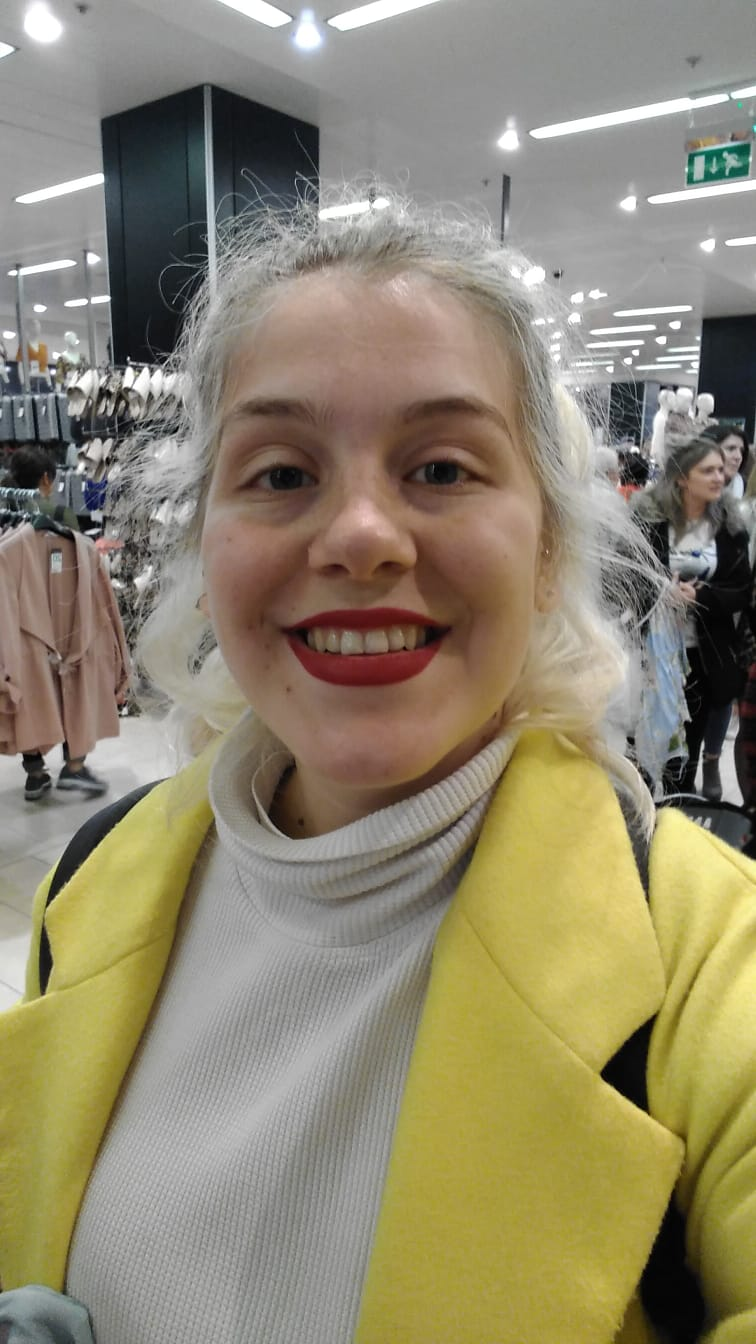

In [10]:
Image("smiling_face.jpg")

In [11]:
faces

array([[134, 287, 463, 463]], dtype=int32)

In [12]:
x, y, width, height = faces[0]

In [13]:
cv2.startWindowThread()
imshow("result",image)
waitKey(0)

-1

In [14]:
#select just the pixels regarding the face
face = image[y:y + height, x:x + width]

In [15]:
cv2.startWindowThread()
imshow("result",image[y:y + height, x:x + width])
waitKey(0)

-1

In [16]:
#resize the image bcz in our model we use 48x48
face = cv2.resize(face, (48,48))
face = face.astype("float")/ 255.0
face = img_to_array(face)
print(face.shape)
#Insert a new axis that will appear at the axis position in the expanded array shape.
face = np.expand_dims(face,axis=0)
print(face.shape)

(48, 48, 1)
(1, 48, 48, 1)


In [17]:
preds = emotion_model.predict(face)

In [18]:
preds

array([[1.7477039e-05, 2.1210994e-06, 6.3905311e-05, 9.8923767e-01,
        6.5665561e-05, 4.1936757e-05, 1.0571171e-02]], dtype=float32)

In [19]:
emotion_probability = np.max(preds)
label = EMOTIONS[preds.argmax()]


In [20]:
label

'happy'

In [21]:
from keras.preprocessing.image import img_to_array
import imutils
import cv2
from keras.models import load_model
import numpy as np

# parameters for loading data and images
detection_model_path = 'haarcascade_frontalface_default.xml'


# hyper-parameters for bounding boxes shape
# loading models
face_detection = cv2.CascadeClassifier(detection_model_path)
emotion_classifier = emotion_model
EMOTIONS = ["angry" ,"disgust","scared", "happy", "sad", "surprised","neutral"]


# starting video streaming
cv2.namedWindow('your_face')
camera = cv2.VideoCapture(0)
while True:
    frame = camera.read()[1]
    #reading the frame
    frame = imutils.resize(frame,width=400)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_detection.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,minSize=(30,30),flags=cv2.CASCADE_SCALE_IMAGE)
    
    canvas = np.zeros((250, 300, 3), dtype="uint8")
    frameClone = frame.copy()
    if len(faces) > 0:
        faces = sorted(faces, reverse=True,
        key=lambda x: (x[2] - x[0]) * (x[3] - x[1]))[0]
        (fX, fY, fW, fH) = faces
                    # Extract the ROI of the face from the grayscale image, resize it to a fixed 48x48 pixels, and then prepare
            # the ROI for classification via the CNN
        roi = gray[fY:fY + fH, fX:fX + fW]
        roi = cv2.resize(roi, (48, 48))
        roi = roi.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)
        
        
        preds = emotion_classifier.predict(roi)[0]
        emotion_probability = np.max(preds)
        label = EMOTIONS[preds.argmax()]

 
    for (i, (emotion, prob)) in enumerate(zip(EMOTIONS, preds)):
                # construct the label text
                text = "{}: {:.2f}%".format(emotion, prob * 100)
                w = int(prob * 300)
                cv2.rectangle(canvas, (7, (i * 35) + 5),
                (w, (i * 35) + 35), (0, 0, 255), -1)
                cv2.putText(canvas, text, (10, (i * 35) + 23),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45,
                (255, 255, 255), 2)
                cv2.putText(frameClone, label, (fX, fY - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
                cv2.rectangle(frameClone, (fX, fY), (fX + fW, fY + fH),
                              (0, 0, 255), 2)

    cv2.imshow('your_face', frameClone)
    cv2.imshow("Probabilities", canvas)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
camera.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 